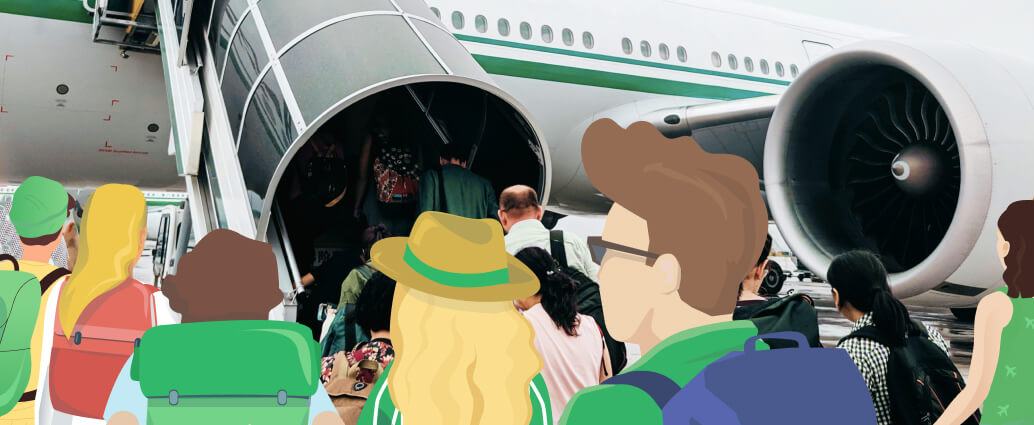

**AIRLINE TIME FORCASTING**
---

In [4]:
import pandas as pd

In [5]:
AP = pd.read_csv('AirPassengers.csv')
print(AP.shape)
print(AP.head())

(144, 2)
      Date  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


In [6]:
print(AP.describe())

       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


In [7]:
print(AP.tail())

        Date  Passengers
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432


In [8]:
AP['Date'] = pd.to_datetime(AP['Date'])
AP.head()

,Date,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
AP.isnull().sum()

Date          0
Passengers    0
dtype: int64

In [10]:
data1 = AP.set_index('Date')
data1.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
split_date = '01-Dec-1957'
data_train = data1.loc[data1.index <= split_date].copy()
data_test = data1.loc[data1.index > split_date].copy()

In [12]:
data_train.shape

(108, 1)

In [13]:
data_test.shape

(36, 1)

In [14]:
def create_features(df, label=None):
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    X = df[['hour','dayofweek','quarter','month','year',
        'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [15]:
X_train, y_train = create_features(data_train, label='Passengers')
X_test, y_test = create_features(data_test, label='Passengers')
X_train

C:\Users\HP\AppData\Local\Temp/ipykernel_11040/1569881646.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,
1949-01-01,0,5,1,1,1949,1,1,53
1949-02-01,0,1,1,2,1949,32,1,5
1949-03-01,0,1,1,3,1949,60,1,9
1949-04-01,0,4,2,4,1949,91,1,13
1949-05-01,0,6,2,5,1949,121,1,17
...,...,...,...,...,...,...,...,...
1957-08-01,0,3,3,8,1957,213,1,31
1957-09-01,0,6,3,9,1957,244,1,35
1957-10-01,0,1,4,10,1957,274,1,40


In [16]:
import xgboost as xgb
